In [1]:
import pandas as pd
import scipy.stats
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
start_time = dt.datetime.now()

In [2]:
data = pd.read_csv('applications data.csv')

In [3]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)

In [4]:
print(mem_usage(data))

244.69 MB


In [5]:
data.shape

(1000000, 10)

In [6]:
data.dtypes

record          int64
date            int64
ssn             int64
firstname      object
lastname       object
address        object
zip5            int64
dob             int64
homephone       int64
fraud_label     int64
dtype: object

In [7]:
data.head(10)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
0,1,20170101,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,19070626,1797504115,0
1,2,20170101,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1
2,3,20170101,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,19070626,216537580,0
3,4,20170101,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0
4,5,20170101,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0
5,6,20170101,922264214,XEEJJSTER,ERJSAXA,4322 USJXU LN,8391,19480613,5742016319,0
6,7,20170101,415812149,XZJRJUSRR,STSMJRUM,478 EEXUM LN,41640,19640318,7697396312,0
7,8,20170101,373752050,EJMRRSUXR,AMTZXRU,8906 UUAJ PL,60567,19190528,2727421586,0
8,9,20170101,769970791,RXTSZJATS,RSXMRJME,8266 SSEAR RD,37934,19900314,5520652307,0
9,10,20170101,732119085,EREMTZXXA,EXMMSEXT,9166 XXSAZ PL,93751,19750127,3749451123,0


In [8]:
data.describe(include='all')

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
count,1000000.000000,1.000000e+06,1.000000e+06,1000000,1000000,1000000,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000
unique,NaN,NaN,NaN,78136,177001,828774,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,EAMSTRMT,ERJSAXA,123 MAIN ST,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,12658,8580,1079,NaN,NaN,NaN,NaN
mean,500000.500000,2.017067e+07,5.083415e+08,NaN,NaN,NaN,50073.333143,1.951725e+07,5.368716e+09,0.014393
std,288675.278933,3.449869e+02,2.934864e+08,NaN,NaN,NaN,28915.921546,3.568872e+05,3.082161e+09,0.119104
min,1.000000,2.017010e+07,3.600000e+01,NaN,NaN,NaN,2.000000,1.900010e+07,5.937990e+05,0.000000
25%,250000.750000,2.017040e+07,2.542176e+08,NaN,NaN,NaN,24992.000000,1.916092e+07,2.677134e+09,0.000000
50%,500000.500000,2.017070e+07,5.088144e+08,NaN,NaN,NaN,50492.000000,1.950090e+07,5.399910e+09,0.000000
75%,750000.250000,2.017100e+07,7.630924e+08,NaN,NaN,NaN,74496.000000,1.983032e+07,8.109241e+09,0.000000


### Make best guess to automatically set numerics or categoricals

In [9]:
# add a dummy categorical column for the case the fields all look numeric
data['dummy'] = 'temp'

df = data.describe(include='all')
frac_unique = df.loc['unique']/ df.loc['count']
s1 = frac_unique.isna()
s2 = np.where(s1)[0]
s3 = np.where(s1 == False)[0]
numerics = data.columns[s2].tolist()
categoricals = data.columns[s3].tolist()

for col in data.columns:
    numunique = data[col].nunique()
    if numunique == len(data) or numunique <=6: # you can adjust this upper limit for your data set
            print(col)
            if col in numerics:
                numerics.remove(col)
                categoricals.extend([col])

# manually switch fields some if desired.          
switch_num2cat = ['ssn','zip5','homephone']
switch_cat2num = []
numerics = [s for s in numerics if s not in switch_num2cat]
categoricals = [s for s in categoricals if s not in switch_cat2num]
numerics.extend(switch_cat2num)
categoricals.extend(switch_num2cat)
categoricals.remove('dummy')
            
print('numerics:',numerics)     
print('\ncategoricals:',categoricals)  

record
fraud_label
dummy
numerics: ['date', 'dob']

categoricals: ['firstname', 'lastname', 'address', 'record', 'fraud_label', 'ssn', 'zip5', 'homephone']


In [10]:
def count_zeros(data):
    count = 0
    for i in data:
        if i == 0:
            count += 1
    return count

In [11]:
statistics_of_data1 = []
for col in numerics:
    num_zeros = count_zeros(data[col])
    percent_zeros = num_zeros / data.shape[0] * 100
    statistics_of_data1.append((col,
                             'numeric',
                             data[col].notnull().sum(),
                             f'{data[col].notnull().sum()/data.shape[0]*100:.1f}%',
#                              f'{percent_zeros:.2f}%',  # convert to percentage with 2 decimal places
                             count_zeros(data[col]),
                             round(data[col].min(), 2),
                             round(data[col].max(), 2),
                             data[col].mean(),
                             round(np.std(data[col]), 2),
                             data[col].mode()[0]
                             ))

stats_dfnum = pd.DataFrame(statistics_of_data1, columns = ['Field Name', 'Field Type','# Records Have Values', '% Populated', '# Zeros', 'Min', 'Max', 'Mean', 'Standard Deviation', 'Most Common'])
stats_dfnum.to_excel('numerics table.xlsx', index=False)
stats_dfnum

,Field Name,Field Type,# Records Have Values,% Populated,# Zeros,Min,Max,Mean,Standard Deviation,Most Common
0,date,numeric,1000000,100.0%,0,20170101,20171231,2.017067e+07,344.99,20170816
1,dob,numeric,1000000,100.0%,0,19000101,20161031,1.951725e+07,356887.02,19070626


In [12]:
statistics_of_data = []
for col in categoricals:
    statistics_of_data.append((col,
                             'categorical',
                             data[col].notnull().sum(),
                             f'{data[col].notnull().sum()/data.shape[0]*100:.1f}%',
                             count_zeros(data[col]),
                             data[col].nunique(),
                             data[col].mode()[0]
                            
                             ))
stats_dfcat = pd.DataFrame(statistics_of_data, columns = ['Field Name', 'Field Type','# Records Have Values', '% Populated', '# Zeros','# Unique Values', 'Most Common',])
stats_dfcat.to_excel('categoricals table.xlsx',index=False)
stats_dfcat

,Field Name,Field Type,# Records Have Values,% Populated,# Zeros,# Unique Values,Most Common
0,firstname,categorical,1000000,100.0%,0,78136,EAMSTRMT
1,lastname,categorical,1000000,100.0%,0,177001,ERJSAXA
2,address,categorical,1000000,100.0%,0,828774,123 MAIN ST
3,record,categorical,1000000,100.0%,0,1000000,1
4,fraud_label,categorical,1000000,100.0%,985607,2,0
5,ssn,categorical,1000000,100.0%,0,835819,999999999
6,zip5,categorical,1000000,100.0%,0,26370,68138
7,homephone,categorical,1000000,100.0%,0,28244,9999999999


In [13]:
data['appyear'] = (data['date'] / 10000).astype('int')
data['appmonth'] = ((data['date'] - data['appyear'] * 10000) / 100).astype('int')
data['appday'] = data['date'] - data['appyear'] * 10000 - data['appmonth'] * 100
data['date'] = pd.to_datetime(data.appyear*10000+data.appmonth*100+data.appday,format='%Y%m%d')
data = data.drop(columns = ['appyear','appmonth','appday'])

In [14]:
data['dobyear'] = (data['dob'] / 10000).astype('int')
data['dobmonth'] = ((data['dob'] - data['dobyear'] * 10000) / 100).astype('int')
data['dobday'] = data['dob'] - data['dobyear'] * 10000 - data['dobmonth'] * 100
data['dob'] = pd.to_datetime(data.dobyear*10000+data.dobmonth*100+data.dobday,format='%Y%m%d')
data = data.drop(columns = ['dobyear','dobmonth','dobday'])

In [15]:
data.dtypes

record                  int64
date           datetime64[ns]
ssn                     int64
firstname              object
lastname               object
address                object
zip5                    int64
dob            datetime64[ns]
homephone               int64
fraud_label             int64
dummy                  object
dtype: object

In [16]:
data.head(5)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label,dummy
0,1,2017-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,1907-06-26,1797504115,0,temp
1,2,2017-01-01,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,1934-06-15,4164239415,1,temp
2,3,2017-01-01,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,1907-06-26,216537580,0,temp
3,4,2017-01-01,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,1944-04-30,132144161,0,temp
4,5,2017-01-01,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,1998-03-15,6101082272,0,temp


In [17]:
data.tail(5)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label,dummy
999995,999996,2017-12-31,766104848,XUSAAURMZ,EJXXEXZX,8079 EJRUJ AVE,54890,1955-04-18,8236558223,0,temp
999996,999997,2017-12-31,445178058,SAAJJEMTX,UMAUETJX,4817 UMSXT AVE,74683,1915-06-24,6790134432,0,temp
999997,999998,2017-12-31,25283410,ESRXXRSUX,EUEJRJJE,7562 RJMAZ ST,86805,1988-06-28,3997657622,0,temp
999998,999999,2017-12-31,361232148,XXMZSRXMA,RSRSUJSS,3408 UZZAM WY,49183,2012-03-02,5935293731,0,temp
999999,1000000,2017-12-31,40027083,RXZXSMEZA,UTEAAZXU,112 UTTJT PL,39491,1982-08-26,5869926905,0,temp


In [18]:
data.describe()

,record,ssn,zip5,homephone,fraud_label
count,1000000.000000,1.000000e+06,1000000.000000,1.000000e+06,1000000.000000
mean,500000.500000,5.083415e+08,50073.333143,5.368716e+09,0.014393
std,288675.278933,2.934864e+08,28915.921546,3.082161e+09,0.119104
min,1.000000,3.600000e+01,2.000000,5.937990e+05,0.000000
25%,250000.750000,2.542176e+08,24992.000000,2.677134e+09,0.000000
50%,500000.500000,5.088144e+08,50492.000000,5.399910e+09,0.000000
75%,750000.250000,7.630924e+08,74496.000000,8.109241e+09,0.000000
max,1000000.000000,1.000000e+09,99999.000000,1.000000e+10,1.000000


In [19]:
categorical_data=data.loc[:, ~data.columns.isin([ 'date','dob'])]

In [20]:
data.count()

record         1000000
date           1000000
ssn            1000000
firstname      1000000
lastname       1000000
address        1000000
zip5           1000000
dob            1000000
homephone      1000000
fraud_label    1000000
dummy          1000000
dtype: int64

In [21]:
data['fraud_label'].sum()

14393

In [22]:
goods = data[data['fraud_label'] == 0]
bads = data[data['fraud_label'] == 1]

In [23]:
numrecords = len(data)
print(numrecords)

1000000


In [24]:
print(len(goods))

985607


In [25]:
print(len(bads))

14393


In [26]:
print(len(goods) + len(bads))

1000000


In [ ]:
# import matplotlib.pyplot as plt

# Plot the fraud label distribution
ax = data['fraud_label'].value_counts().plot(kind='bar', logy=True)

# Set labels, title, and font size
plt.xlabel('Fraud Label', fontsize=20)  # 0 = Non-Fraud, 1 = Fraud
plt.ylabel('Count', fontsize=20)
plt.title('Fraud vs Non-Fraud Cases', fontsize=20)

# Set custom x-tick labels with font size
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'], rotation=9, fontsize=16)

# Set y-tick font size
plt.yticks(fontsize=16)

# Annotate the bars with counts
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=16)

# Show the plot
plt.show()

In [27]:
len(data['record'].unique())

1000000

In [28]:
len(data['record']) * 100 / numrecords

100.0

In [29]:
len(data['date']) * 100 / numrecords

100.0

In [30]:
len(data['date'].unique())

365

In [31]:
count_day = data.groupby('date').count()
count_day.head(10)

,record,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label,dummy
date,,,,,,,,,,
2017-01-01,2840,2840,2840,2840,2840,2840,2840,2840,2840,2840
2017-01-02,2719,2719,2719,2719,2719,2719,2719,2719,2719,2719
2017-01-03,2764,2764,2764,2764,2764,2764,2764,2764,2764,2764
2017-01-04,2757,2757,2757,2757,2757,2757,2757,2757,2757,2757
2017-01-05,2732,2732,2732,2732,2732,2732,2732,2732,2732,2732
2017-01-06,2682,2682,2682,2682,2682,2682,2682,2682,2682,2682
2017-01-07,2782,2782,2782,2782,2782,2782,2782,2782,2782,2782
2017-01-08,2809,2809,2809,2809,2809,2809,2809,2809,2809,2809
2017-01-09,2779,2779,2779,2779,2779,2779,2779,2779,2779,2779


<Axes: title={'center': 'Daily Applications'}, xlabel='date'>

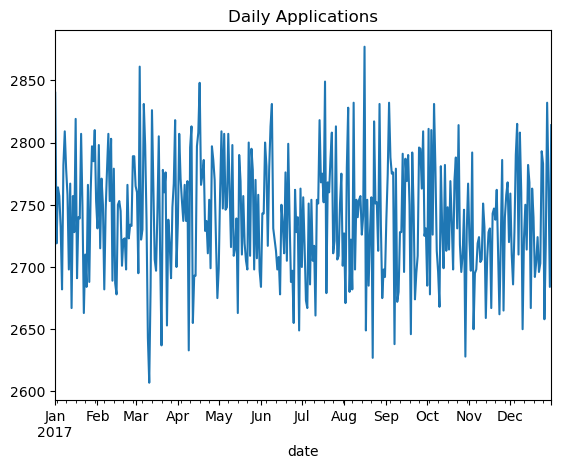

In [32]:
daily_count = data.assign(trx = np.ones(numrecords)).set_index(data['date']).resample(dt.timedelta(days = 1))\
    .count().trx
daily_count.plot(title = 'Daily Applications')

In [33]:
daily_count.head(70)

date
2017-01-01    2840
2017-01-02    2719
2017-01-03    2764
2017-01-04    2757
2017-01-05    2732
              ... 
2017-03-07    2831
2017-03-08    2798
2017-03-09    2738
2017-03-10    2643
2017-03-11    2607
Freq: D, Name: trx, Length: 70, dtype: int64

In [34]:
# daily_count['2016-02-29'] = daily_count['2016-02-28']
# daily_count.head(70)

<Axes: title={'center': 'Daily Applications'}, xlabel='date'>

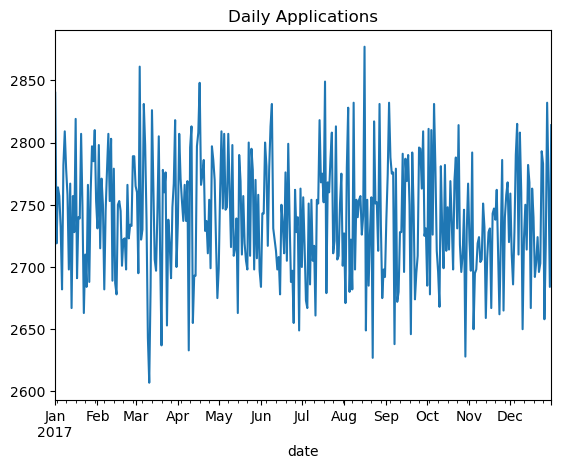

In [35]:
daily_count.plot(title = 'Daily Applications')

<Axes: title={'center': 'Daily Applicationss'}, xlabel='date'>

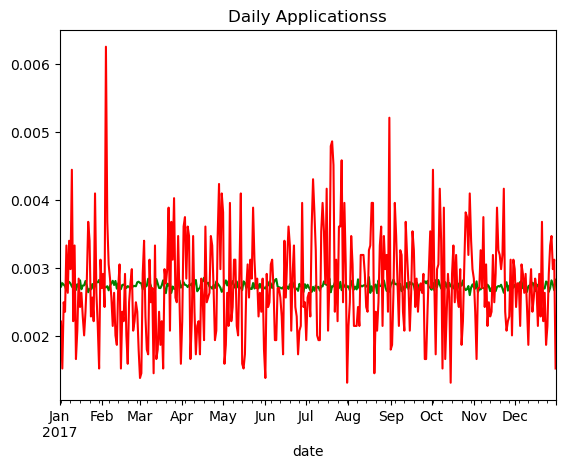

In [36]:
ngoods = len(goods)
nbads = len(bads)
goods_series = goods.assign(trx = np.ones(ngoods)).set_index(goods['date']).resample(dt.timedelta(days = 1)).count().trx
norm_goods_series = goods_series / ngoods
norm_goods_series.plot(title = 'Daily Applicationss', color = 'green')
bads_series = bads.assign(trx = np.ones(nbads)).set_index(bads['date']).resample(dt.timedelta(days = 1)).count().trx
norm_bads_series = bads_series / nbads
norm_bads_series.plot(color = 'red')

<Axes: title={'center': 'Weekly Applications'}, xlabel='date'>

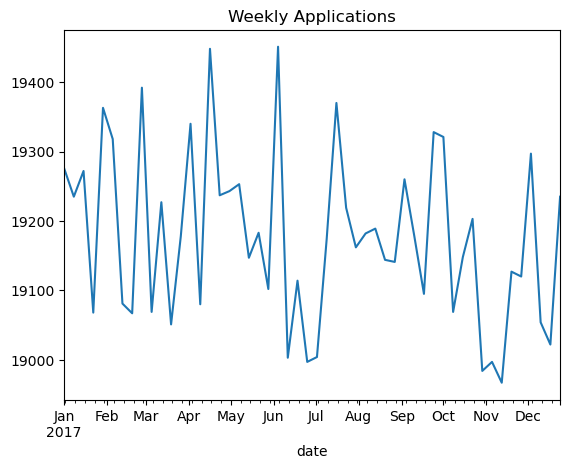

In [37]:
weekly_applications = data.assign(trx = np.ones(numrecords)).set_index(data['date']).resample(dt.timedelta(days = 7))\
    .count().trx
weekly_applications = weekly_applications[:-1]
weekly_applications.plot(title = 'Weekly Applications')

<Axes: title={'center': 'Weeky Applications'}, xlabel='date'>

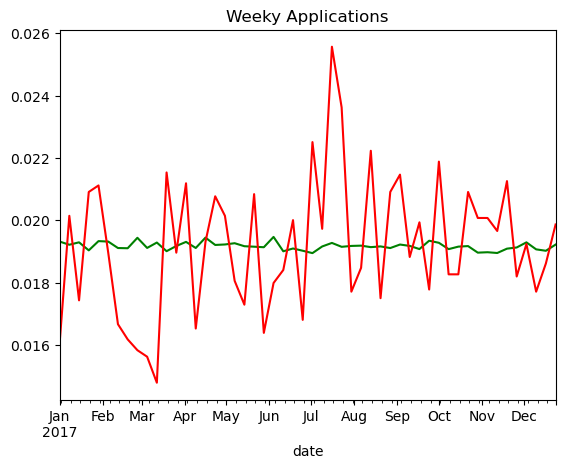

In [38]:
goods_series = goods.assign(trx = np.ones(ngoods)).set_index(goods['date']).resample(dt.timedelta(days = 7)).count().trx
goods_series = goods_series[:-1]
norm_goods_series = goods_series / ngoods
norm_goods_series.plot(title = 'Weeky Applications', color = 'green')
bads_series = bads.assign(trx = np.ones(nbads)).set_index(bads['date']).resample(dt.timedelta(days = 7)).count().trx
bads_series = bads_series[:-1]
norm_bads_series = bads_series / nbads
norm_bads_series.plot(color = 'red')

In [39]:
len(data['ssn']) * 100 / numrecords

100.0

In [40]:
len(data['ssn'].unique())

835819

In [41]:
data['ssn'].value_counts()

999999999    16935
938972725      114
810776805       81
829352390       74
473311863       44
             ...  
571979227        1
154696808        1
962389432        1
746697518        1
361232148        1
Name: ssn, Length: 835819, dtype: int64

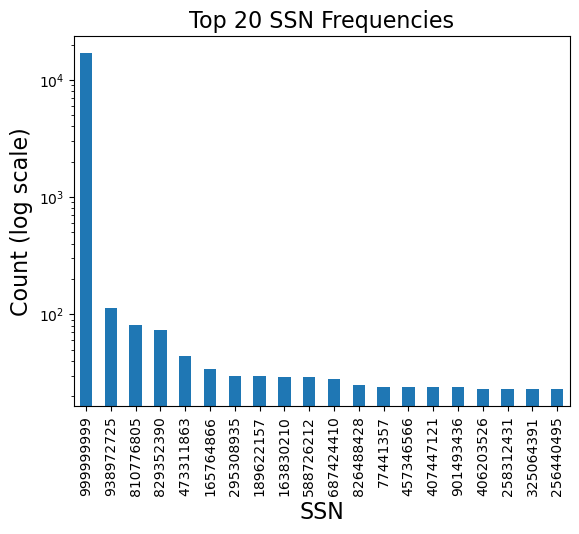

In [42]:
data['ssn'].value_counts().head(20).plot(kind='bar',logy=True)

plt.rcParams.update({'figure.figsize':(12,8)})
plt.xlabel('SSN',  fontsize=16)
plt.ylabel('Count (log scale)', fontsize=16)
plt.title('Top 20 SSN Frequencies',fontsize=16)
plt.savefig('ssn_frequencies.jpeg')


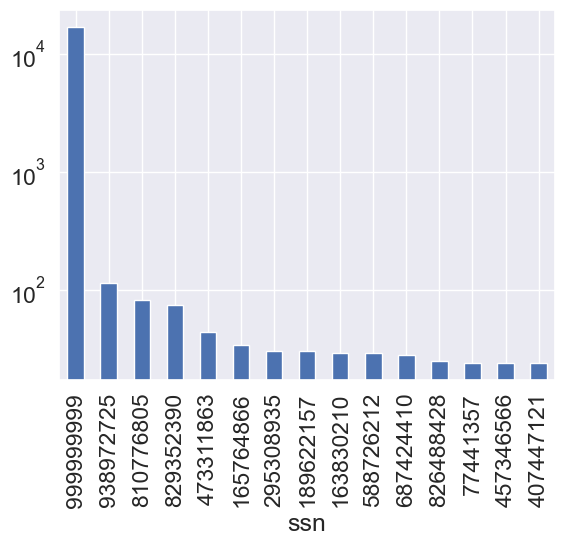

In [43]:
sns.set(font_scale=1.5)
data['ssn'].value_counts().head(15).plot(kind = 'bar')
plt.yscale('log')

In [43]:
data[data['ssn'] == 999999999].head(20)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label,dummy
10,11,2017-01-01,999999999,UZZSMXSEE,USJZUSA,726 UMTXU ST,92129,1940-01-26,3026547212,0,temp
22,23,2017-01-01,999999999,ETXMUSZEM,UJMAMEU,3387 STRUM WY,45982,1958-08-30,5568704443,0,temp
64,65,2017-01-01,999999999,STUMMAMTS,SSJXTUJM,6393 UEJEA LN,41640,1907-06-26,9999999999,0,temp
68,69,2017-01-01,999999999,UUZAJXZMT,SRAAMZXU,2557 URRXS DR,98407,2011-08-31,5490098836,0,temp
74,75,2017-01-01,999999999,AUATMMZX,UUUTAZR,30 ETXRM ST,38402,1976-06-25,2382673773,0,temp
283,284,2017-01-01,999999999,MSJUZSMZJ,UXMTEZUT,356 UZSRE AVE,74187,1907-06-26,153492955,0,temp
380,381,2017-01-01,999999999,XRJSMRRRT,RMRXAMX,9769 UAMZJ DR,52351,1907-06-26,3181686949,0,temp
420,421,2017-01-01,999999999,XRXMTMZEZ,SZRXXJMX,5854 RXRXX PL,34957,1997-07-21,316681200,0,temp
446,447,2017-01-01,999999999,RRZUZUSX,ESZRRRAA,8970 AXME RD,48333,1911-07-29,5350782211,0,temp
468,469,2017-01-01,999999999,XETRJXESR,SSJXTUJM,6995 RMSST CT,48162,1970-04-18,2503172355,0,temp


In [44]:
len(data[data['ssn'] == 999999999])

16935

In [45]:
data.loc[data['ssn'] == 999999999, 'ssn'] = data.loc[data['ssn'] == 999999999, 'record']

In [46]:
len(data[data['ssn'] == 999999999])

0

In [47]:
data.head(25)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label,dummy
0,1,2017-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,1907-06-26,1797504115,0,temp
1,2,2017-01-01,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,1934-06-15,4164239415,1,temp
2,3,2017-01-01,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,1907-06-26,216537580,0,temp
3,4,2017-01-01,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,1944-04-30,132144161,0,temp
4,5,2017-01-01,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,1998-03-15,6101082272,0,temp
5,6,2017-01-01,922264214,XEEJJSTER,ERJSAXA,4322 USJXU LN,8391,1948-06-13,5742016319,0,temp
6,7,2017-01-01,415812149,XZJRJUSRR,STSMJRUM,478 EEXUM LN,41640,1964-03-18,7697396312,0,temp
7,8,2017-01-01,373752050,EJMRRSUXR,AMTZXRU,8906 UUAJ PL,60567,1919-05-28,2727421586,0,temp
8,9,2017-01-01,769970791,RXTSZJATS,RSXMRJME,8266 SSEAR RD,37934,1990-03-14,5520652307,0,temp
9,10,2017-01-01,732119085,EREMTZXXA,EXMMSEXT,9166 XXSAZ PL,93751,1975-01-27,3749451123,0,temp


<Axes: >

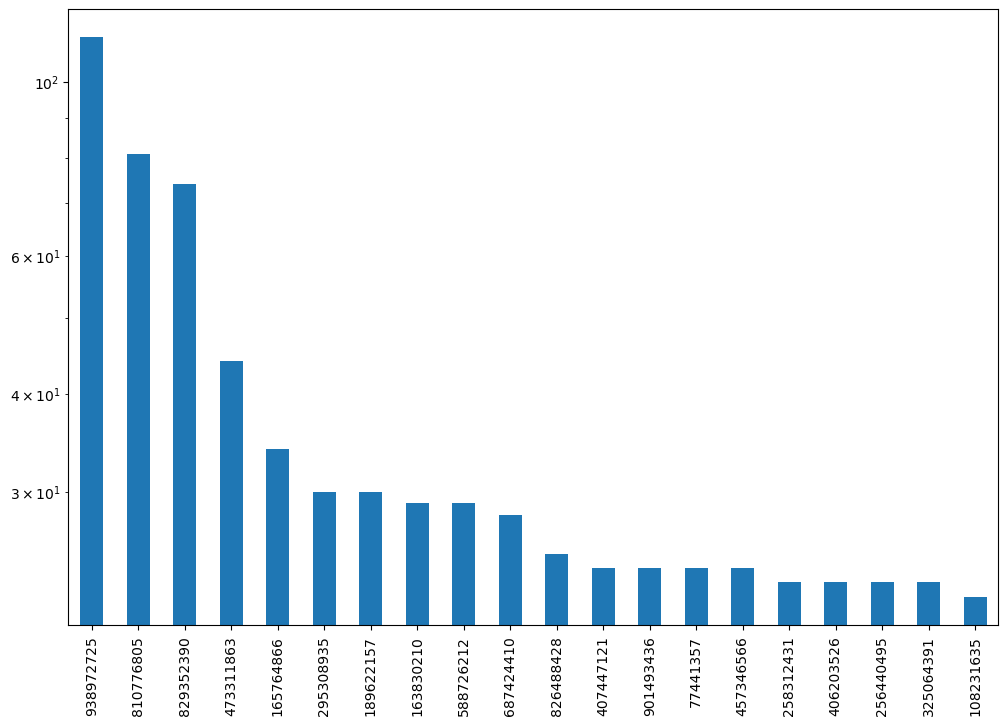

In [48]:
data['ssn'].value_counts().head(20).plot(kind='bar',logy=True)

In [49]:
len(data['firstname']) * 100 / numrecords

100.0

In [50]:
len(data['firstname'].unique())

78136

In [51]:
data['firstname'].value_counts()

EAMSTRMT     12658
TXEMXZZM     10297
UXXJJZTUZ    10235
UJSRSMUEZ     9994
SREZUJMJU     9688
             ...  
TUSSMZJA         1
SSAZJXSRM        1
UATETTATJ        1
UASJMZXZJ        1
RUZUJJRMX        1
Name: firstname, Length: 78136, dtype: int64

Text(0.5, 1.0, 'Top 20 First Names Frequencies')

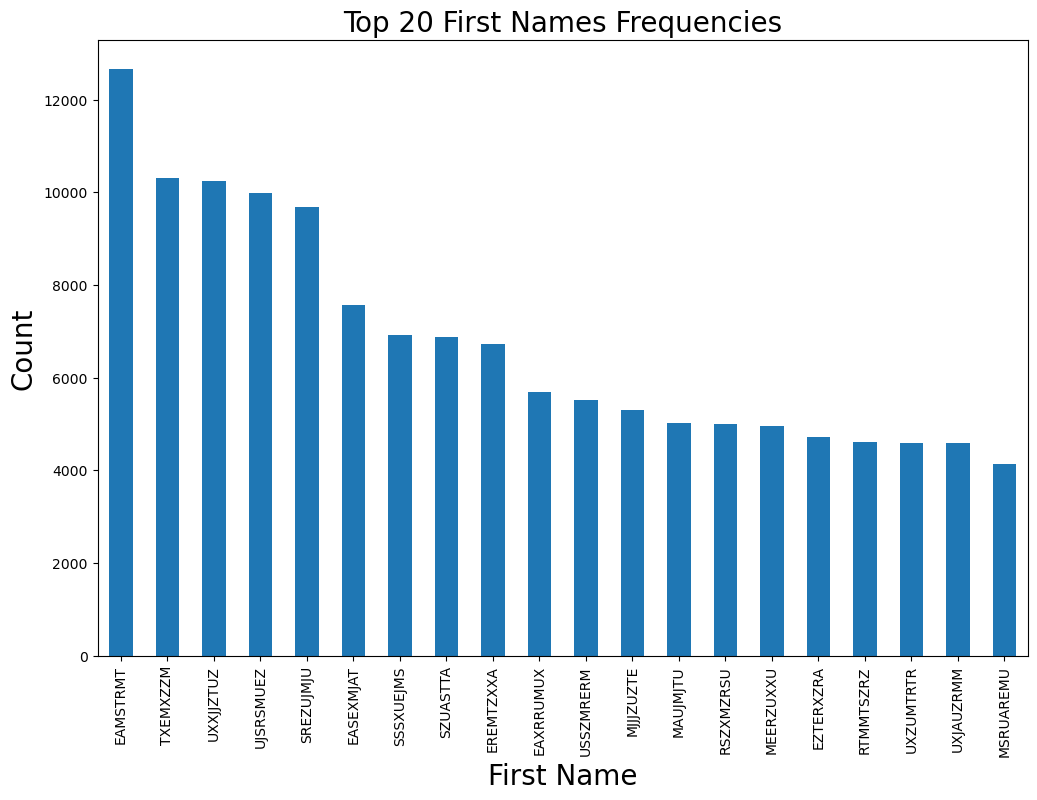

In [60]:
data['firstname'].value_counts().head(20).plot(kind='bar')

# Set labels, title, and font size for Firstname Value Counts

plt.xlabel('First Name', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Top 20 First Names Frequencies', fontsize=20)

In [61]:
len(data['lastname']) * 100 / numrecords

100.0

In [62]:
len(data['lastname'].unique())

177001

In [63]:
data['lastname'].value_counts()

ERJSAXA     8580
UMXUUUSE    7156
UMARRMA     6832
MEAXJUX     5492
XMERRR      5451
            ... 
RMJZJRMJ       1
SSUTSMUM       1
EXASZEXS       1
UERZXTTR       1
RMJZURRS       1
Name: lastname, Length: 177001, dtype: int64

Text(0.5, 1.0, 'Top 20 Last Names Frequencies')

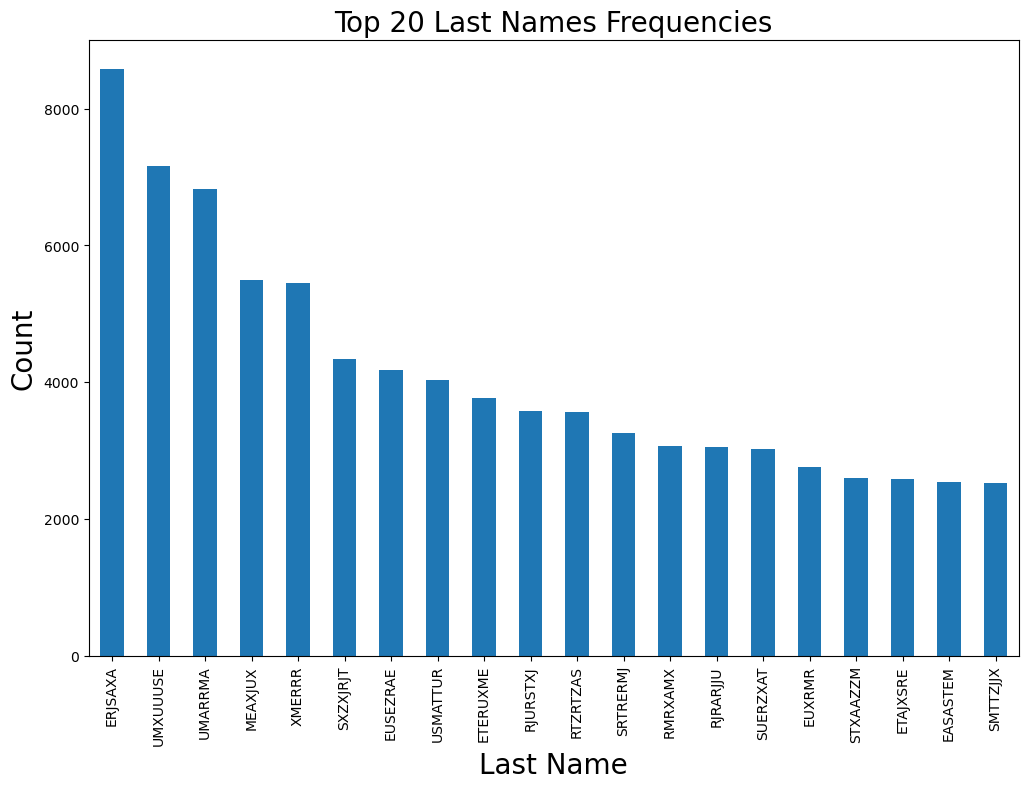

In [64]:
data['lastname'].value_counts().head(20).plot(kind='bar')

plt.xlabel('Last Name', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Top 20 Last Names Frequencies', fontsize=20)

In [65]:
len(data['address']) * 100 / numrecords

100.0

In [66]:
len(data['address'].unique())

828774

In [67]:
data['address'].value_counts()

123 MAIN ST        1079
1775 XJXE LN         97
7433 RAEZA ST        80
8911 MZSU DR         74
4907 RRAAU DR        73
                   ... 
1179 RATUS BLVD       1
8006 SSRJM ST         1
6327 MAXR ST          1
4937 ESAMR LN         1
3408 UZZAM WY         1
Name: address, Length: 828774, dtype: int64

Text(0.5, 1.0, 'Top 20 Addresses Frequencies')

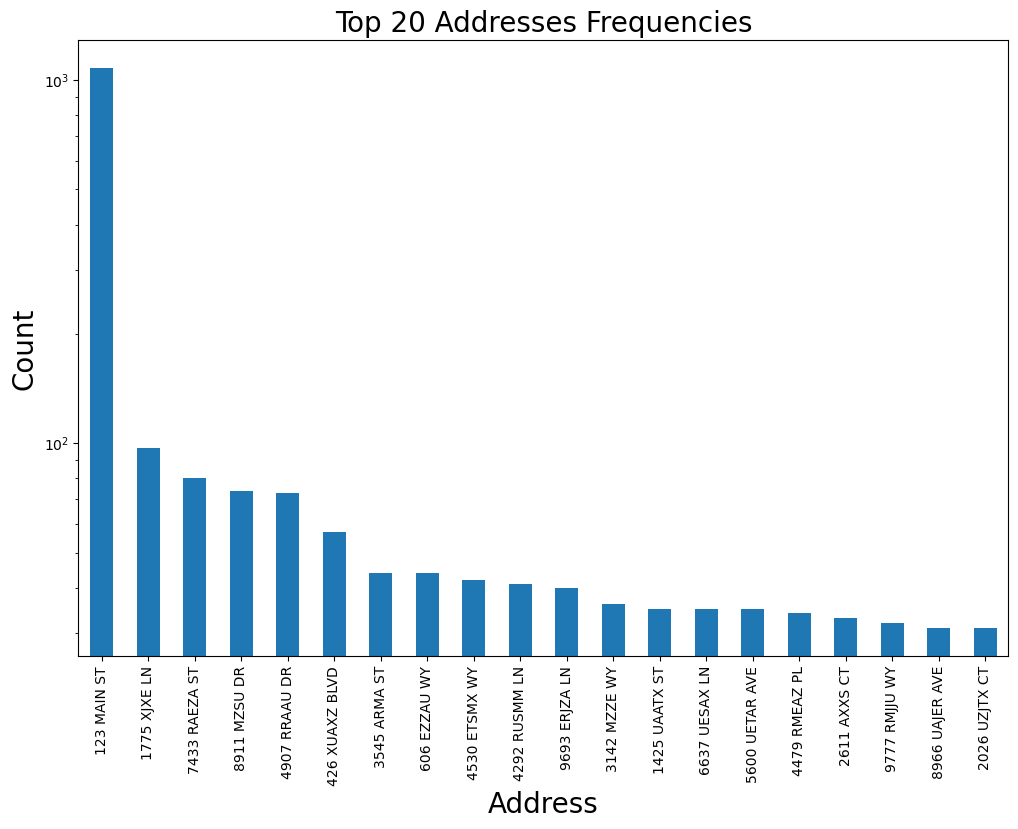

In [73]:
data['address'].value_counts().head(20).plot(kind='bar',logy=True)

plt.xlabel('Address', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Top 20 Addresses Frequencies', fontsize=20)

In [74]:
data[data['address'] == '123 MAIN ST'].head(20)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label,dummy
1247,1248,2017-01-01,904524264,UJSRSMUEZ,EAXAXAXA,123 MAIN ST,68138,1924-10-31,8135264540,0,temp
2191,2192,2017-01-01,345413970,XXSMUSEJT,SRRAXESJ,123 MAIN ST,68138,1930-05-26,94097353,0,temp
2529,2530,2017-01-01,821839005,UXZUMTRTR,EARTMRJS,123 MAIN ST,68138,1962-11-01,7715547340,0,temp
3434,3435,2017-01-02,24205988,SXTUZZXAS,UJJAJMM,123 MAIN ST,68138,1964-04-28,8788942828,0,temp
3750,3751,2017-01-02,623763056,SEZESJMSR,UZJEUZMT,123 MAIN ST,68138,1973-11-07,974228226,0,temp
4715,4716,2017-01-02,686787130,SXXSZJMM,ARRZTAA,123 MAIN ST,68138,1981-03-23,1839236819,1,temp
5353,5354,2017-01-02,932938215,UXRJESTM,EETAEAR,123 MAIN ST,68138,1998-05-13,5441682419,0,temp
7299,7300,2017-01-03,417080344,SJETUJAAZ,REMJTREU,123 MAIN ST,92821,1934-09-14,7507186577,0,temp
8512,8513,2017-01-04,477797652,EAMSTRMT,UTXXZZET,123 MAIN ST,68138,1919-05-19,5922864904,0,temp
8750,8751,2017-01-04,6367698,XUERJXSTU,EERMEXAE,123 MAIN ST,42035,1982-11-27,6442565981,0,temp


In [75]:
len(data['zip5']) * 100 / numrecords

100.0

In [76]:
len(data['zip5'].unique())

26370

In [77]:
data['zip5'].value_counts()

68138    823
90042    514
89835    489
35227    478
14931    459
        ... 
1599       1
69474      1
51017      1
25995      1
21226      1
Name: zip5, Length: 26370, dtype: int64

Text(0.5, 1.0, 'Top 20 ZIP Codes Frequencies')

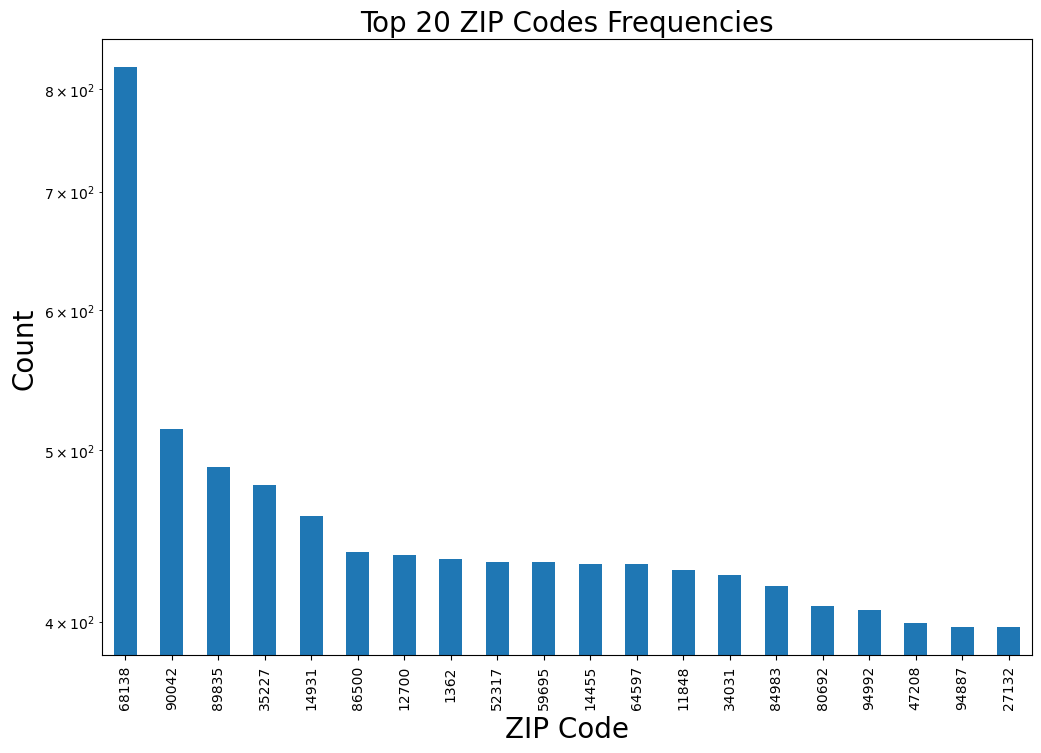

In [78]:
data['zip5'].value_counts().head(20).plot(kind='bar',logy=True)

plt.xlabel('ZIP Code', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Top 20 ZIP Codes Frequencies', fontsize=20)

In [79]:
data['fulladdress'] = data['address'] + ' ' + data['zip5'].astype('str')
# data = data.drop(columns = ['zip5', 'address'])

<Axes: >

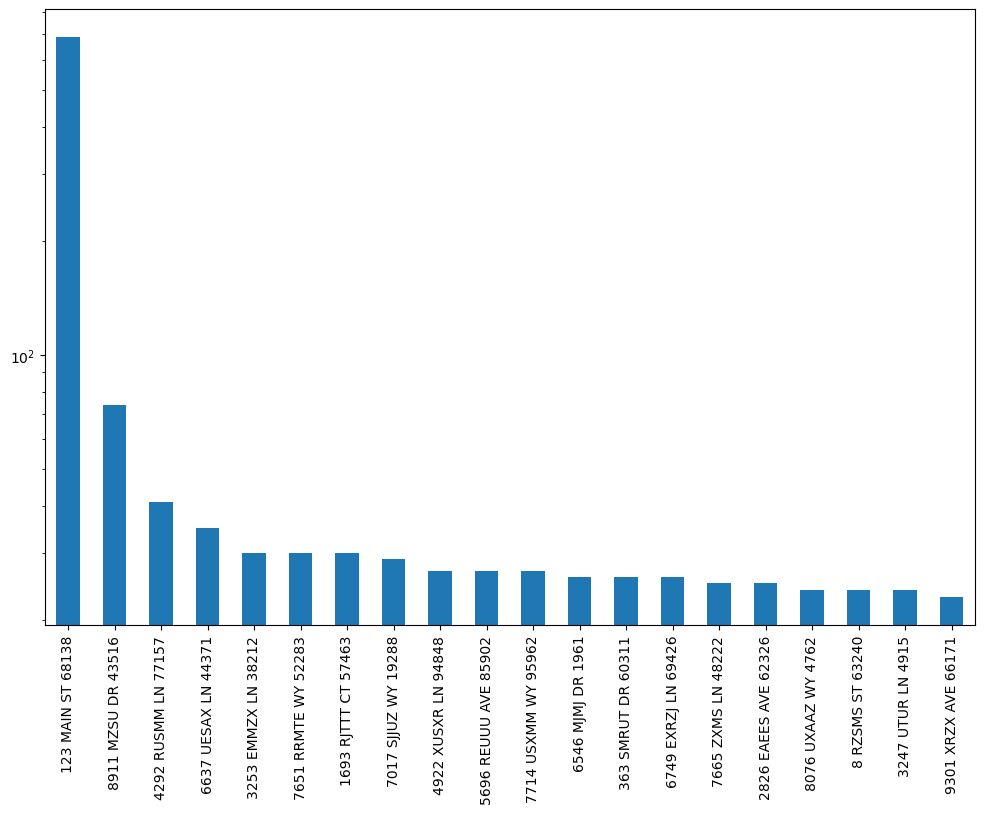

In [80]:
data['fulladdress'].value_counts().head(20).plot(kind='bar',logy=True)

In [81]:
old_address = [data.iloc[1247]['address'],data.iloc[2191]['address'],data.iloc[2529]['address']]
print(old_address)

['123 MAIN ST', '123 MAIN ST', '123 MAIN ST']


In [82]:
len(data[data['address'] == '123 MAIN ST'])

1079

In [83]:
data.loc[data['address'] == '123 MAIN ST', 'address'] = data.loc[data['address'] == '123 MAIN ST', 'record'].astype('str')

In [84]:
len(data[data['address'] == '123 MAIN ST'])

0

In [85]:
new_address = [data.iloc[1247]['address'],data.iloc[2191]['address'],data.iloc[2529]['address']]
print(new_address)

['1248', '2192', '2530']


In [86]:
data['fulladdress'] = data['address'] + ' ' + data['zip5'].astype('str')
# data = data.drop(columns = ['zip5', 'address'])

<Axes: >

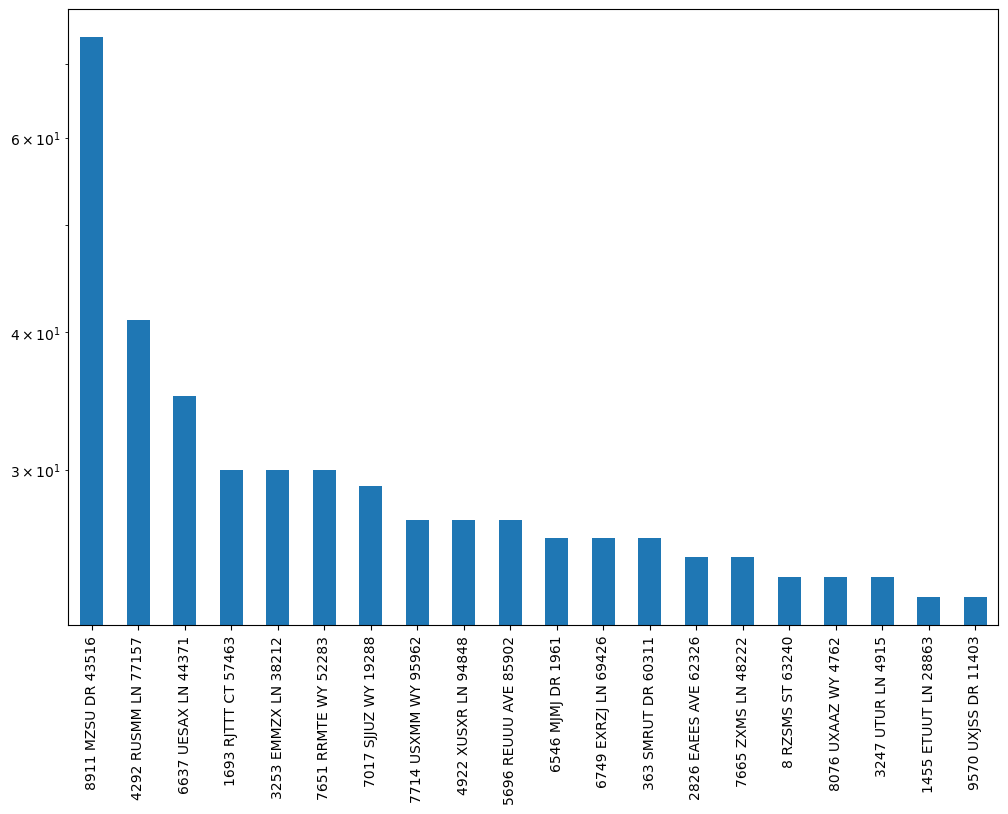

In [87]:
data['fulladdress'].value_counts().head(20).plot(kind='bar',logy=True)

In [88]:
len(data['dob']) * 100 / numrecords

100.0

In [89]:
len(data['dob'].unique())

42673

In [90]:
data['dob'].value_counts()

1907-06-26    126568
1964-03-18      4818
1976-06-25      3723
1988-06-28      1404
1974-02-16       980
               ...  
1928-07-30         5
1986-03-13         5
1919-02-23         5
1944-11-27         5
1996-09-04         5
Name: dob, Length: 42673, dtype: int64

Text(0.5, 1.0, 'Top 20 Dates of Birth Frequencies')

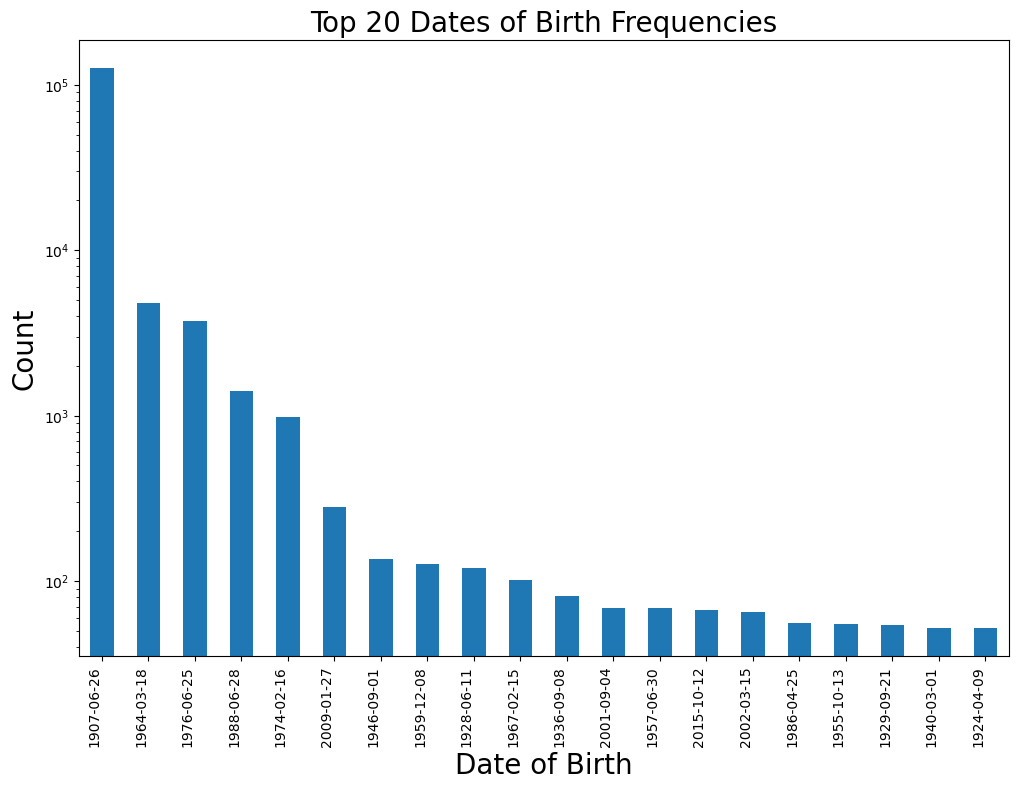

In [92]:
dob_counts = data['dob'].value_counts().head(20)

# Plot the data
dob_counts.plot(kind='bar', logy=True)

# Format x-axis labels to remove the time part
formatted_dob_labels = dob_counts.index.strftime('%Y-%m-%d')  # Only show the date part
# Apply the formatted labels to the x-axis
plt.xticks(ticks=range(len(formatted_dob_labels)), labels=formatted_dob_labels, rotation=90, ha='right')

plt.xlabel('Date of Birth', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Top 20 Dates of Birth Frequencies', fontsize=20)



In [93]:
count_dob = data.groupby('dob').count()
count_dob.head(10)

,record,date,ssn,firstname,lastname,address,zip5,homephone,fraud_label,dummy,fulladdress
dob,,,,,,,,,,,
1900-01-01,23,23,23,23,23,23,23,23,23,23,23
1900-01-02,15,15,15,15,15,15,15,15,15,15,15
1900-01-03,26,26,26,26,26,26,26,26,26,26,26
1900-01-04,22,22,22,22,22,22,22,22,22,22,22
1900-01-05,17,17,17,17,17,17,17,17,17,17,17
1900-01-06,25,25,25,25,25,25,25,25,25,25,25
1900-01-07,22,22,22,22,22,22,22,22,22,22,22
1900-01-08,18,18,18,18,18,18,18,18,18,18,18
1900-01-09,12,12,12,12,12,12,12,12,12,12,12


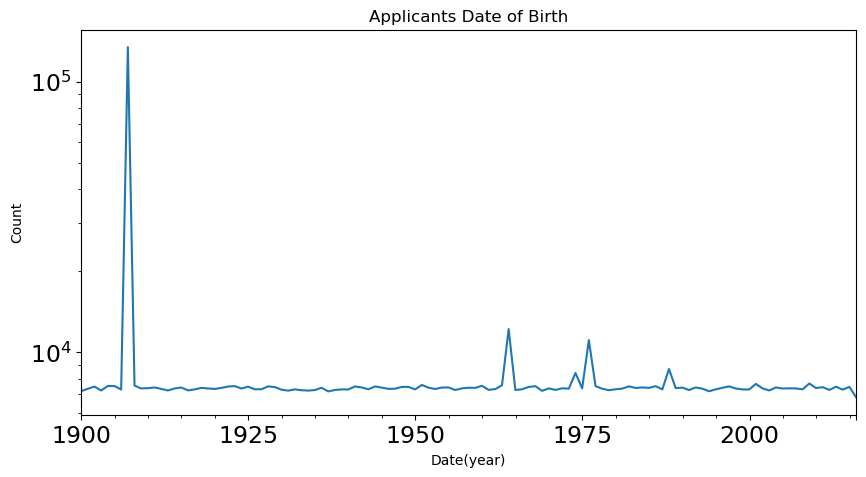

In [94]:
dob_count = data.assign(trx = np.ones(numrecords)).set_index(data['dob']).resample(dt.timedelta(days = 365))\
.count().trx
dob_count.plot(figsize=(10,5), fontsize=17, title = 'Applicants Date of Birth', xlabel='Date(year)', ylabel='Count')
plt.yscale('log')

In [122]:
data.loc[data['dob'] == 19070626, 'dob'] = data.loc[data['dob'] == 19070626, 'record']

<Axes: >

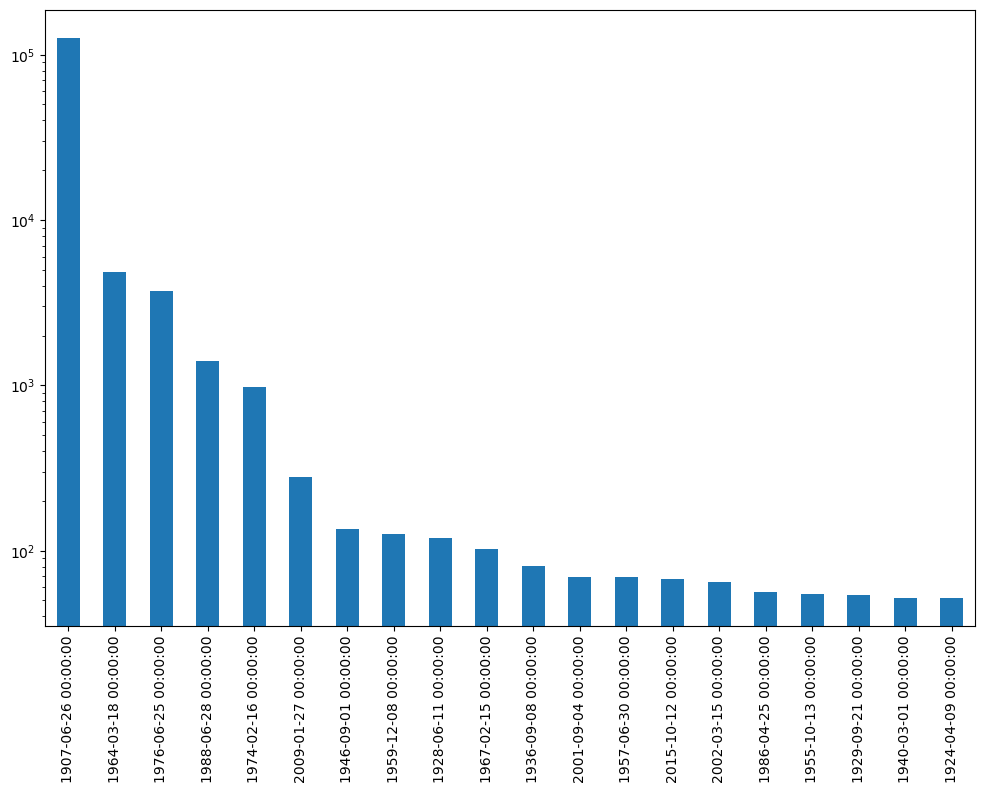

In [123]:
data['dob'].value_counts().head(20).plot(kind='bar',logy=True)

In [97]:
len(data['homephone']) * 100 / numrecords

100.0

In [98]:
len(data['homephone'].unique())

28244

In [99]:
data['homephone'].value_counts()

9999999999    78512
6384782007      466
6035129044      360
2113738531      331
4024680535      198
              ...  
3450484388        1
5376503138        1
7106175831        1
5010200060        1
6271618925        1
Name: homephone, Length: 28244, dtype: int64

Text(0.5, 1.0, 'Top 20 Home Phone Numbers Frequencies')

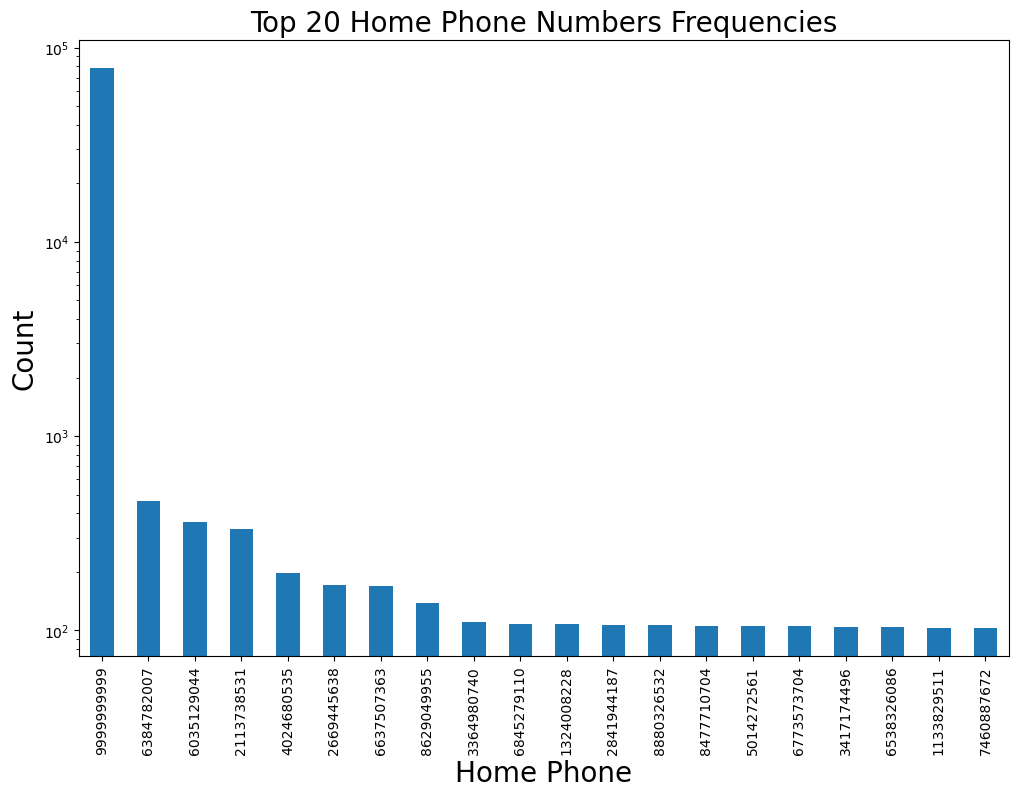

In [100]:
data['homephone'].value_counts().head(20).plot(kind='bar',logy=True)

In [101]:
data[data['homephone'] == 9999999999].head(10)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label,dummy,fulladdress
17,18,2017-01-01,346374636,XRSSZZUXT,ETXZXJAJ,5719 UEZJT PL,51486,1950-01-10 00:00:00,9999999999,0,temp,5719 UEZJT PL 51486
26,27,2017-01-01,735495403,EMSSTSXUA,STZRUXZM,9323 STRMS PL,51395,1988-11-11 00:00:00,9999999999,0,temp,9323 STRMS PL 51395
60,61,2017-01-01,780136117,UZTZEETU,ARUZTZM,5317 UTXME ST,37840,1973-11-29 00:00:00,9999999999,0,temp,5317 UTXME ST 37840
64,65,2017-01-01,65,STUMMAMTS,SSJXTUJM,6393 UEJEA LN,41640,1907-06-26 00:00:00,9999999999,0,temp,6393 UEJEA LN 41640
145,146,2017-01-01,671506143,TXEMXZZM,SRTERSRA,5795 UMUTM BLVD,45077,1903-09-13 00:00:00,9999999999,0,temp,5795 UMUTM BLVD 45077
149,150,2017-01-01,149112205,EZTERXZRA,EERMAXJU,2249 XXAU DR,27375,1984-12-06 00:00:00,9999999999,0,temp,2249 XXAU DR 27375
178,179,2017-01-01,507916615,EUEJUURAR,XUSMXRU,8314 XXMX DR,398,1972-04-16 00:00:00,9999999999,0,temp,8314 XXMX DR 398
179,180,2017-01-01,106080337,SRARXRMRM,UTJMRJUX,8413 URUEU WY,15746,1907-06-26 00:00:00,9999999999,0,temp,8413 URUEU WY 15746
180,181,2017-01-01,291680381,MUSXJTSSX,EXAAJUT,9762 SXJXM LN,41694,1962-05-04 00:00:00,9999999999,0,temp,9762 SXJXM LN 41694
200,201,2017-01-01,13382014,EAMSTRMT,RURSXSXX,372 SXTEA DR,42716,1907-06-26 00:00:00,9999999999,0,temp,372 SXTEA DR 42716


In [102]:
len(data[data['homephone'] == 9999999999])

78512

In [104]:
len(data[data['homephone'] == 9999999999])

0

In [105]:
data.head(30)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label,dummy,fulladdress
0,1,2017-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,1907-06-26 00:00:00,1797504115,0,temp,6861 EUTST PL 2765
1,2,2017-01-01,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,1934-06-15 00:00:00,4164239415,1,temp,7280 URASA PL 57169
2,3,2017-01-01,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,1907-06-26 00:00:00,216537580,0,temp,5581 RSREX LN 56721
3,4,2017-01-01,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,1944-04-30 00:00:00,132144161,0,temp,1387 UJZXJ RD 35286
4,5,2017-01-01,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,1998-03-15 00:00:00,6101082272,0,temp,279 EAASA WY 3173
5,6,2017-01-01,922264214,XEEJJSTER,ERJSAXA,4322 USJXU LN,8391,1948-06-13 00:00:00,5742016319,0,temp,4322 USJXU LN 8391
6,7,2017-01-01,415812149,XZJRJUSRR,STSMJRUM,478 EEXUM LN,41640,1964-03-18 00:00:00,7697396312,0,temp,478 EEXUM LN 41640
7,8,2017-01-01,373752050,EJMRRSUXR,AMTZXRU,8906 UUAJ PL,60567,1919-05-28 00:00:00,2727421586,0,temp,8906 UUAJ PL 60567
8,9,2017-01-01,769970791,RXTSZJATS,RSXMRJME,8266 SSEAR RD,37934,1990-03-14 00:00:00,5520652307,0,temp,8266 SSEAR RD 37934
9,10,2017-01-01,732119085,EREMTZXXA,EXMMSEXT,9166 XXSAZ PL,93751,1975-01-27 00:00:00,3749451123,0,temp,9166 XXSAZ PL 93751


<Axes: >

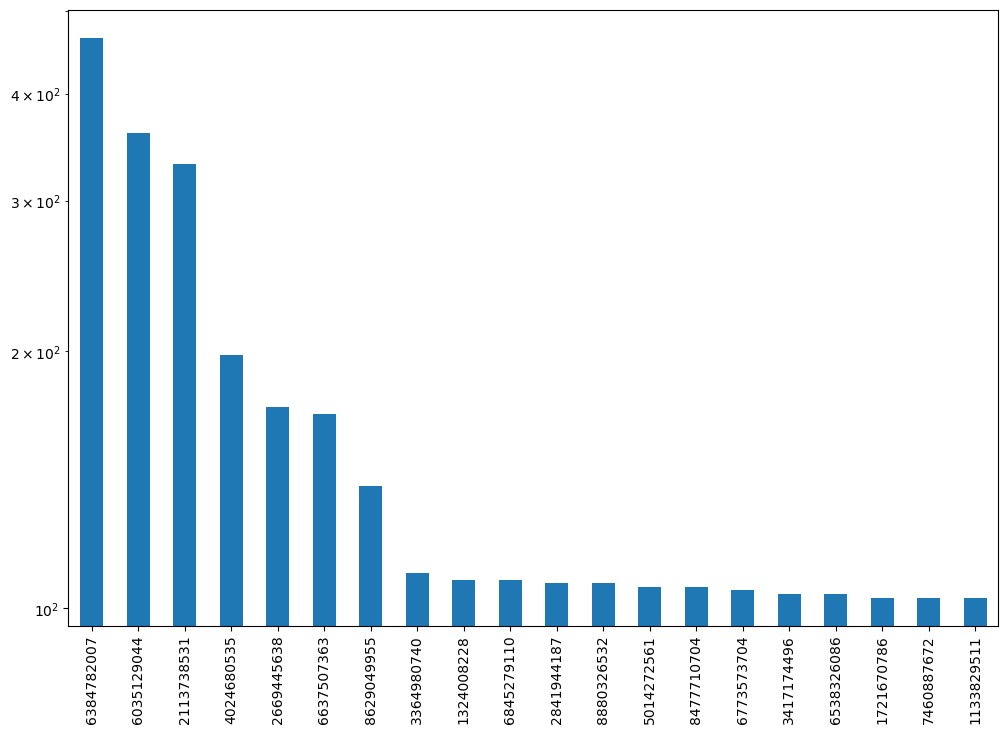

In [106]:
data['homephone'].value_counts().head(20).plot(kind='bar',logy=True)

In [107]:
data = data.drop(columns = 'fulladdress')
data.head(10)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label,dummy
0,1,2017-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,1907-06-26 00:00:00,1797504115,0,temp
1,2,2017-01-01,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,1934-06-15 00:00:00,4164239415,1,temp
2,3,2017-01-01,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,1907-06-26 00:00:00,216537580,0,temp
3,4,2017-01-01,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,1944-04-30 00:00:00,132144161,0,temp
4,5,2017-01-01,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,1998-03-15 00:00:00,6101082272,0,temp
5,6,2017-01-01,922264214,XEEJJSTER,ERJSAXA,4322 USJXU LN,8391,1948-06-13 00:00:00,5742016319,0,temp
6,7,2017-01-01,415812149,XZJRJUSRR,STSMJRUM,478 EEXUM LN,41640,1964-03-18 00:00:00,7697396312,0,temp
7,8,2017-01-01,373752050,EJMRRSUXR,AMTZXRU,8906 UUAJ PL,60567,1919-05-28 00:00:00,2727421586,0,temp
8,9,2017-01-01,769970791,RXTSZJATS,RSXMRJME,8266 SSEAR RD,37934,1990-03-14 00:00:00,5520652307,0,temp
9,10,2017-01-01,732119085,EREMTZXXA,EXMMSEXT,9166 XXSAZ PL,93751,1975-01-27 00:00:00,3749451123,0,temp


In [108]:
data.shape

(1000000, 11)

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   record       1000000 non-null  int64         
 1   date         1000000 non-null  datetime64[ns]
 2   ssn          1000000 non-null  int64         
 3   firstname    1000000 non-null  object        
 4   lastname     1000000 non-null  object        
 5   address      1000000 non-null  object        
 6   zip5         1000000 non-null  int64         
 7   dob          1000000 non-null  object        
 8   homephone    1000000 non-null  int64         
 9   fraud_label  1000000 non-null  int64         
 10  dummy        1000000 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 83.9+ MB


In [110]:
data.describe()

,record,ssn,zip5,homephone,fraud_label
count,1000000.000000,1.000000e+06,1000000.000000,1.000000e+06,1000000.000000
mean,500000.500000,4.914150e+08,50073.333143,4.583635e+09,0.014393
std,288675.278933,2.934649e+08,28915.921546,3.076022e+09,0.119104
min,1.000000,1.100000e+01,2.000000,1.800000e+01,0.000000
25%,250000.750000,2.370395e+08,24992.000000,1.857659e+09,0.000000
50%,500000.500000,4.916291e+08,50492.000000,4.544521e+09,0.000000
75%,750000.250000,7.457676e+08,74496.000000,7.254188e+09,0.000000
max,1000000.000000,9.999999e+08,99999.000000,9.999318e+09,1.000000


In [111]:
data.to_csv('applications clean.csv', index = False)

In [112]:
print('duration: ', dt.datetime.now()-start_time)

duration:  0:12:25.832523
